Data Set Information:

The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.


We will be performing the classification to find the number of absent hours.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor

from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
abse=pd.read_csv('absenteeism_at_work.csv',sep=';')

In [3]:
abse.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
#lets view the datatypes of the features

abse.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [9]:
#Changing the columns into appropriate type to perform classification

abse['Social drinker']=abse['Social drinker'].astype('bool')
abse['Social smoker']=abse['Social smoker'].astype('bool')
abse['Disciplinary failure']=abse['Disciplinary failure'].astype('bool')
abse['Seasons']=abse['Seasons'].astype('category')
abse['Seasons']=abse['Seasons'].astype('category')
abse['Education']=abse['Education'].astype('category')
abse['Month of absence']=abse['Month of absence'].astype('category')
abse['Reason for absence']=abse['Reason for absence'].astype('category')
abse['Day of the week']=abse['Day of the week'].astype('category')


In [10]:
#Checking the dtypes
abse.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null category
Month of absence                   740 non-null category
Day of the week                    740 non-null category
Seasons                            740 non-null category
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null bool
Education                          740 non-null category
Son                                740 non-null int64
Social drinker                     740 non-null bool
Social smoker                      740 non-null bool
Pet              

In [11]:
#Lets check all the unique values

for col in abse.columns:
    print(abse[col].unique())

[11 36  3  7 10 20 14  1 24  6 33 18 30  2 19 27 34  5 15 29 28 13 22 17
 31 23 32  9 26 21  8 25 12 16  4 35]
[26, 0, 23, 7, 22, ..., 15, 4, 3, 2, 16]
Length: 28
Categories (28, int64): [26, 0, 23, 7, ..., 4, 3, 2, 16]
[7, 8, 9, 10, 11, ..., 3, 4, 5, 6, 0]
Length: 13
Categories (13, int64): [7, 8, 9, 10, ..., 4, 5, 6, 0]
[3, 4, 5, 6, 2]
Categories (5, int64): [3, 4, 5, 6, 2]
[1, 4, 2, 3]
Categories (4, int64): [1, 4, 2, 3]
[289 118 179 279 361 260 155 235 246 189 248 330 157 291 184 225 369 388
 378 228 300 268 231 233]
[36 13 51  5 52 50 12 11 25 29 16 27 42 10 20 31 26 17 22 15 49 48 14 35
 45]
[13 18 14  3 11 16  4  6 12  7 10  9 17 29  8  1 15 24]
[33 50 38 39 28 36 34 37 41 47 29 48 32 27 43 40 31 30 49 58 46 53]
[239.554 205.917 241.476 253.465 306.345 261.306 308.593 302.585 343.253
 326.452 378.884 377.55  275.312 265.615 294.217 265.017 284.031 236.629
 330.061 251.818 244.387 239.409 246.074 253.957 230.29  249.797 261.756
 284.853 268.519 280.549 313.532 264.249 222.196 246

In [12]:
#Checking for the null values..

abse.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [13]:
#copying the dataset to another df..

ab=abse.copy()

In [16]:
abse[abse['Month of absence']==0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
737,4,0,0,3,1,118,14,13,40,271.219,...,False,1,1,True,False,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,False,1,2,True,False,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,...,False,1,1,False,False,1,77,175,25,0


Month of the absence cant be 0,or its improperly displayed..so ignoring as the rows are very less

In [17]:
abse=abse[abse['Month of absence']!=0]

In [18]:
#Lets check for the improper values in label

abse[abse['Absenteeism time in hours']==0]



,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,36,0,7,3,1,118,13,18,50,239.554,...,True,1,1,True,False,0,98,178,31,0
50,20,0,9,2,4,260,50,11,36,241.476,...,True,1,4,True,False,0,65,168,23,0
51,29,0,9,2,4,225,26,9,28,241.476,...,True,1,1,False,False,2,69,169,24,0
54,11,0,9,3,4,289,36,13,33,241.476,...,True,1,2,True,False,1,90,172,30,0
55,36,0,9,3,4,118,13,18,50,241.476,...,True,1,1,True,False,0,98,178,31,0
58,13,0,9,4,4,369,17,12,31,241.476,...,True,1,3,True,False,0,70,169,25,0
64,36,0,10,4,4,118,13,18,50,253.465,...,True,1,1,True,False,0,98,178,31,0
134,34,27,1,2,2,118,10,10,37,308.593,...,False,1,0,False,False,0,83,172,28,0
203,2,0,4,2,3,235,29,12,48,326.452,...,True,1,1,False,True,5,88,163,33,0
213,7,0,5,4,3,279,5,14,39,378.884,...,True,1,2,True,True,0,68,168,24,0


In [19]:
len(abse[abse['Disciplinary failure']==1])

40

In [24]:
#Generally the reason for absence is most related to absenteeism hours..
#finding the proper rows.. wrt absenteeism in hours and reason

abse[(abse['Absenteeism time in hours']==0) & (abse['Disciplinary failure']!=1)]



,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
134,34,27,1,2,2,118,10,10,37,308.593,...,False,1,0,False,False,0,83,172,28,0


Considering the above row as a valid row since abs in hours is 0 and no disciplinary failure

In [25]:
abse[abse['Reason for absence']==27][['Absenteeism time in hours']].mean()

Absenteeism time in hours    2.275362
dtype: float64

In [26]:
abse.loc[(abse['Reason for absence']==27) & (abse['Absenteeism time in hours']==0),'Absenteeism time in hours']=3

In [27]:
abse.loc[(abse['Absenteeism time in hours']==0),'Absenteeism time in hours']=8

In [28]:
abse.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,False,1,2,True,False,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,True,1,1,True,False,0,98,178,31,8
2,3,23,7,4,1,179,51,18,38,239.554,...,False,1,0,True,False,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,False,1,2,True,True,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,False,1,2,True,False,1,90,172,30,2


In [29]:
#Checking the shape

abse.shape

(737, 21)

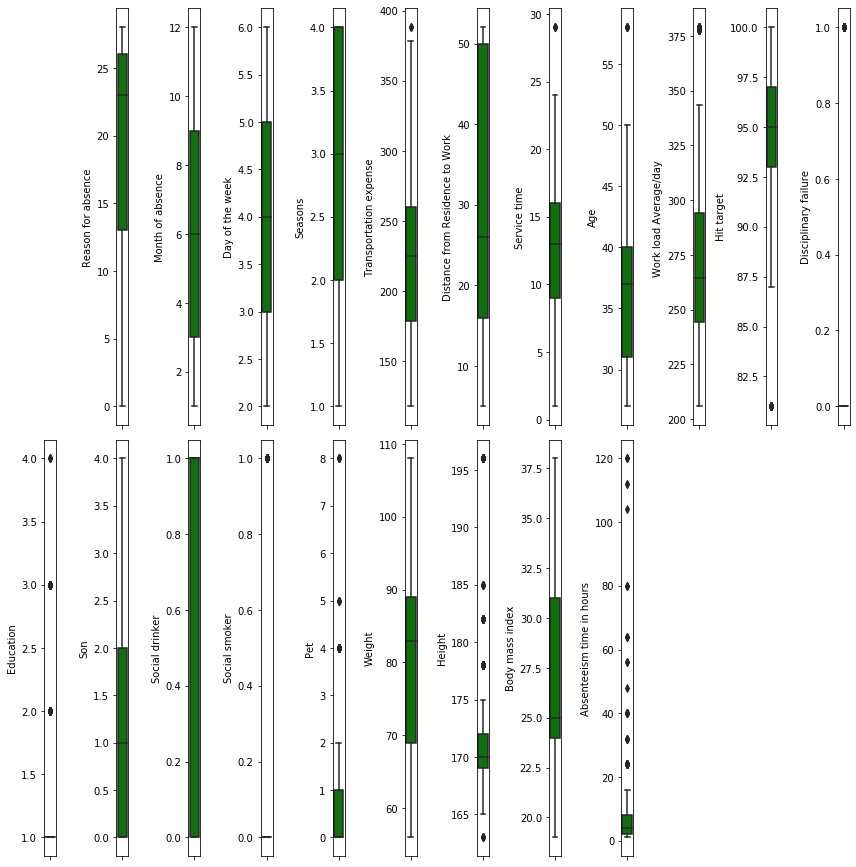

In [30]:
#Performing the EDA
nrows=10
ncols=12
collist=abse.columns.values


plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sbn.boxplot(abse[collist[i]],color='green',orient='v')
    plt.tight_layout()
    

By looking at the above plot,we can observe that there are some outliers present in several columns..

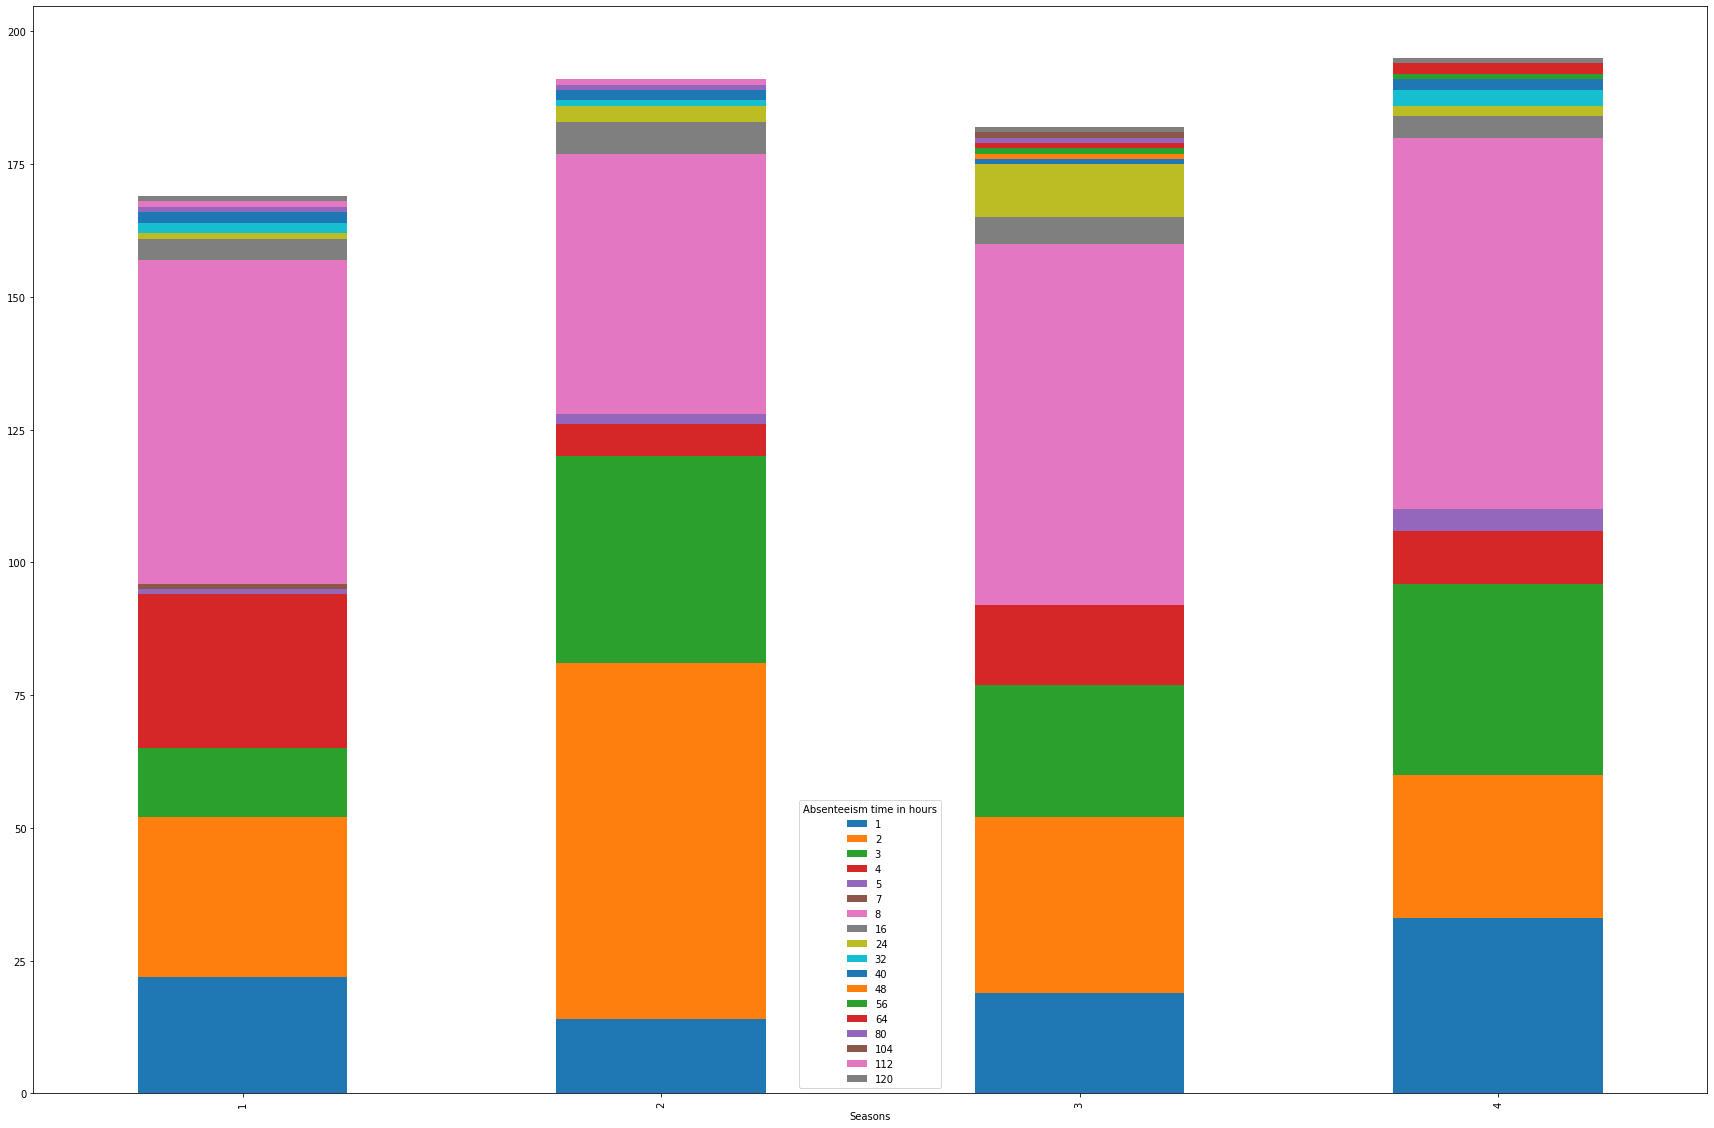

In [32]:
#EDA

abse.groupby(['Seasons','Absenteeism time in hours']).size().unstack().plot(kind='bar',stacked=True,figsize=(30,20))

the above plot suggests that the maximum absenteeism is at s2.

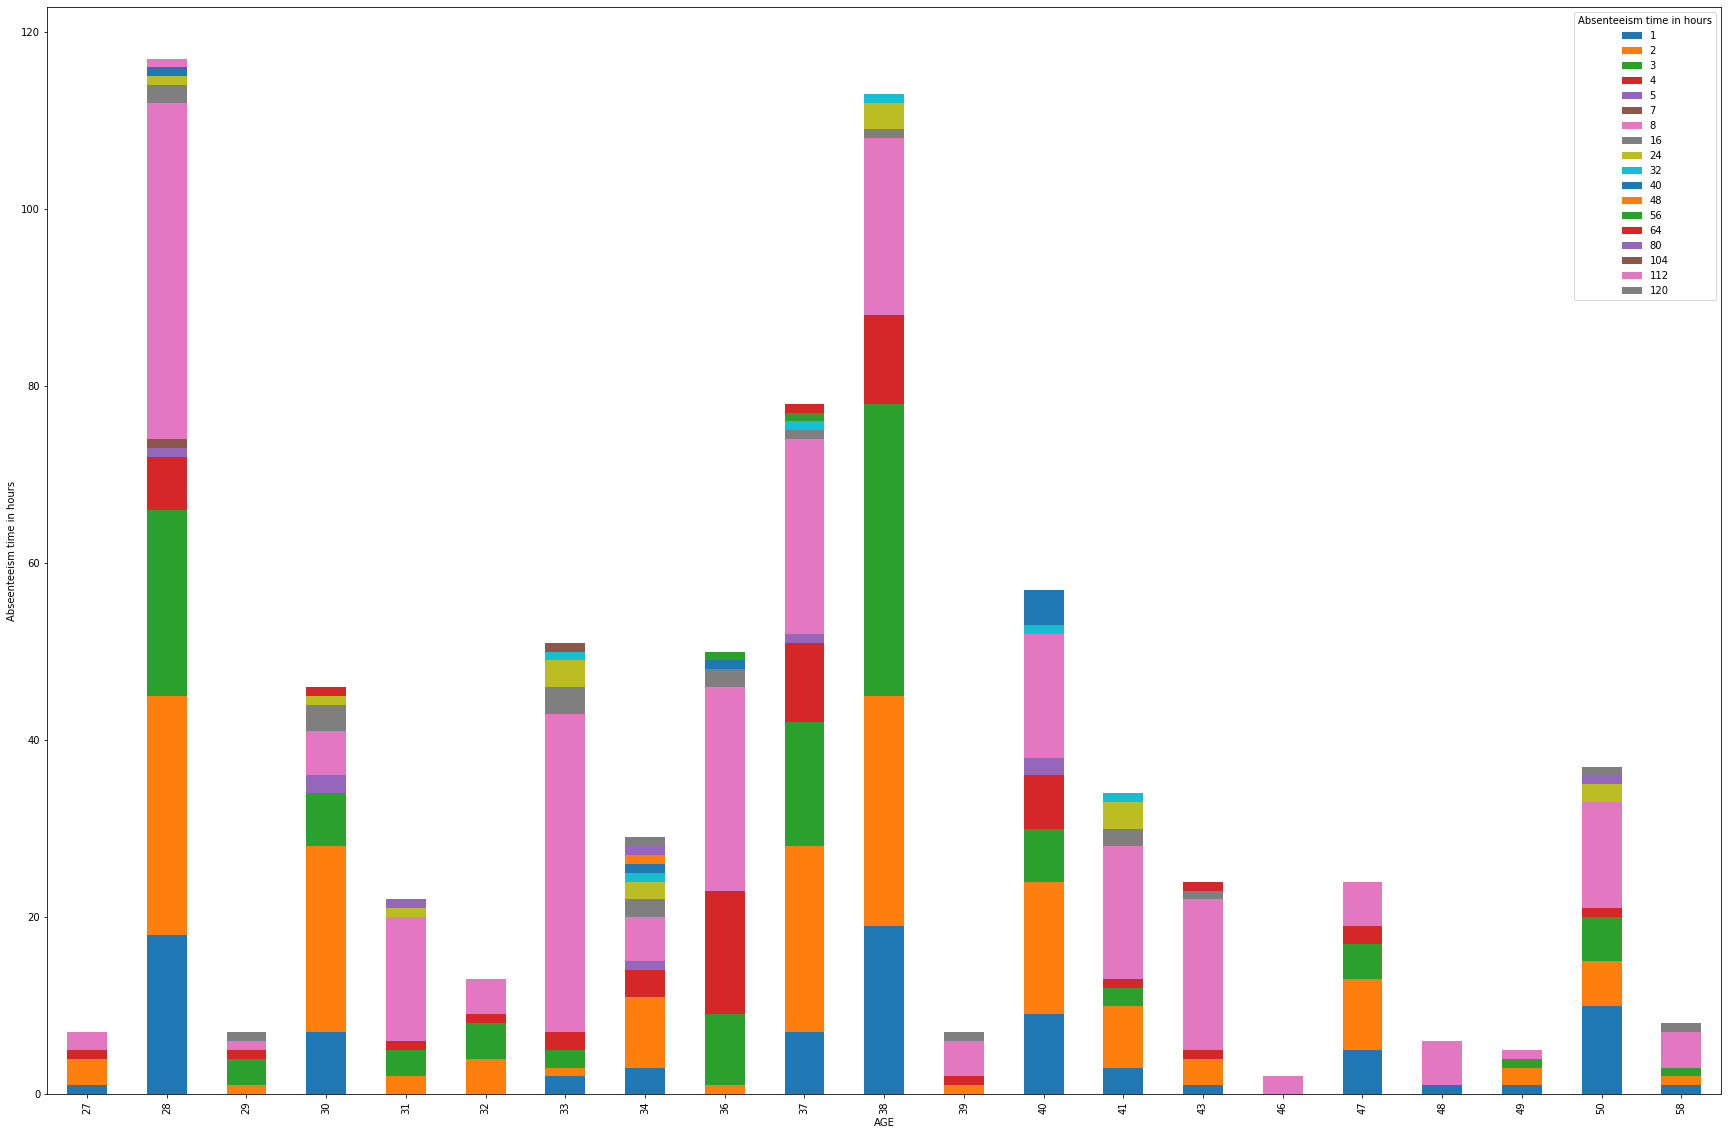

In [34]:
abse.groupby(['Age','Absenteeism time in hours']).size().unstack().plot(kind='bar',stacked=True,figsize=(30,20))
plt.xlabel('AGE')
plt.ylabel('Abseenteeism time in hours')
plt.show()

The plot is against absenteeism in hours and age.It can be observed from the above plot that at age 28,38 absenteeism is more.

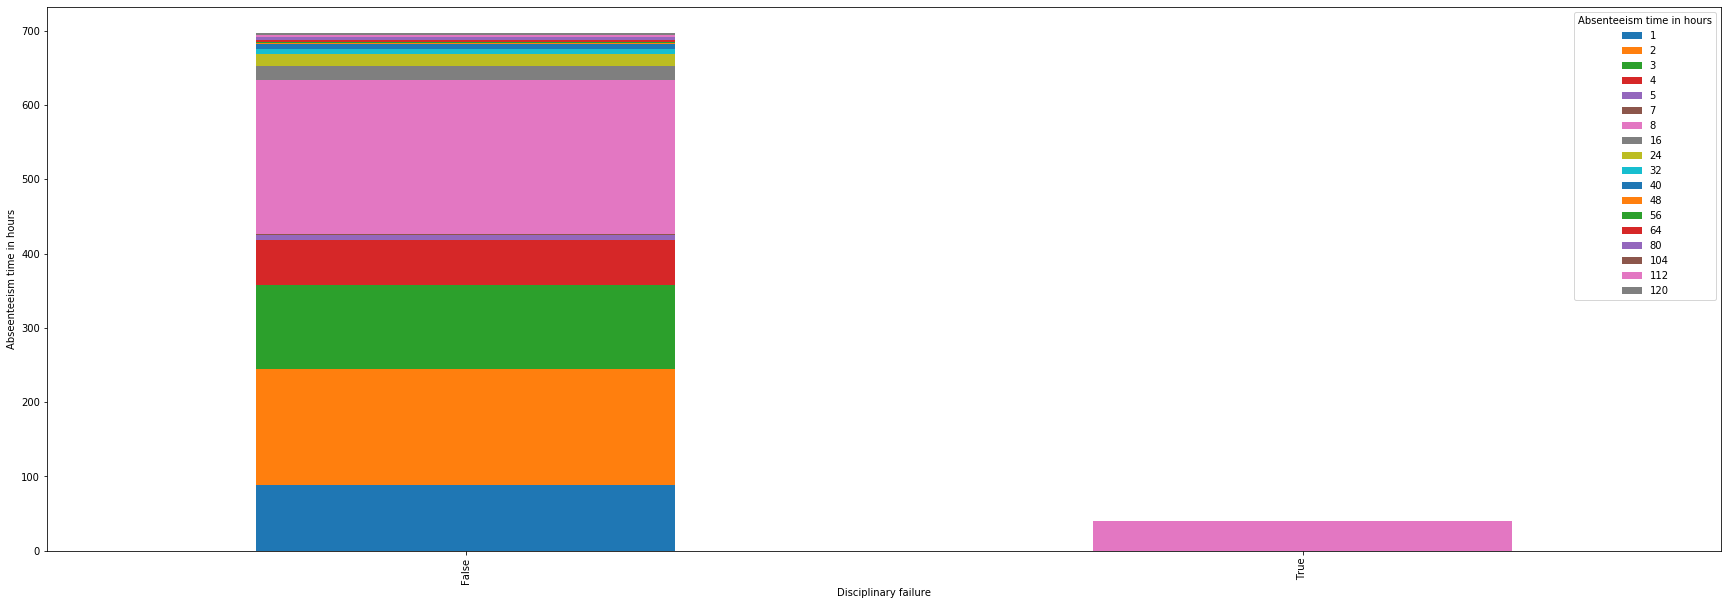

In [35]:
abse.groupby(['Disciplinary failure','Absenteeism time in hours']).size().unstack().plot(kind='bar',stacked=True,figsize=(30,10))
plt.xlabel('Disciplinary failure')
plt.ylabel('Abseenteeism time in hours')
plt.show()

The absenteeism at work is recorded when the disciplinary failure is false/0

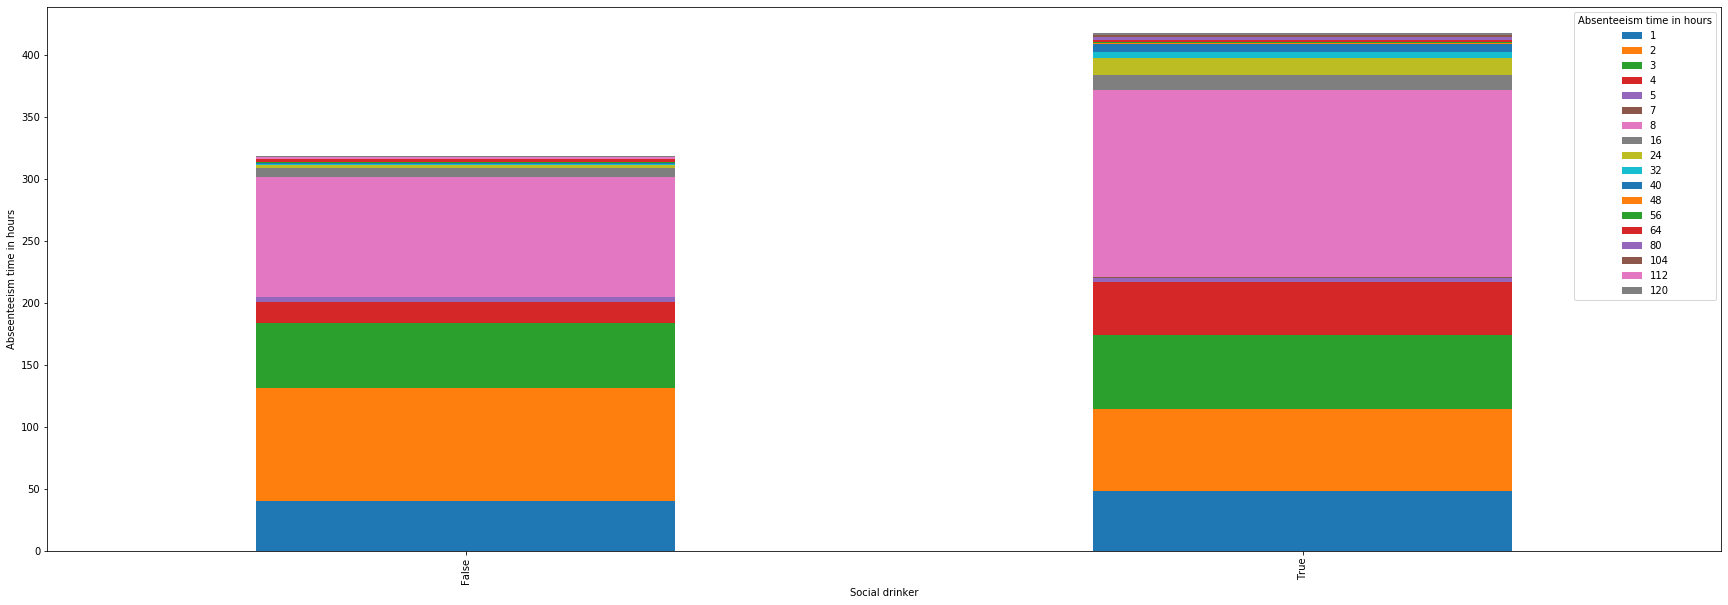

In [36]:
abse.groupby(['Social drinker','Absenteeism time in hours']).size().unstack().plot(kind='bar',stacked=True,figsize=(30,10))
plt.xlabel('Social drinker')
plt.ylabel('Abseenteeism time in hours')
plt.show()

It is observed from the above plot, absenteeism is more on the right side(1)

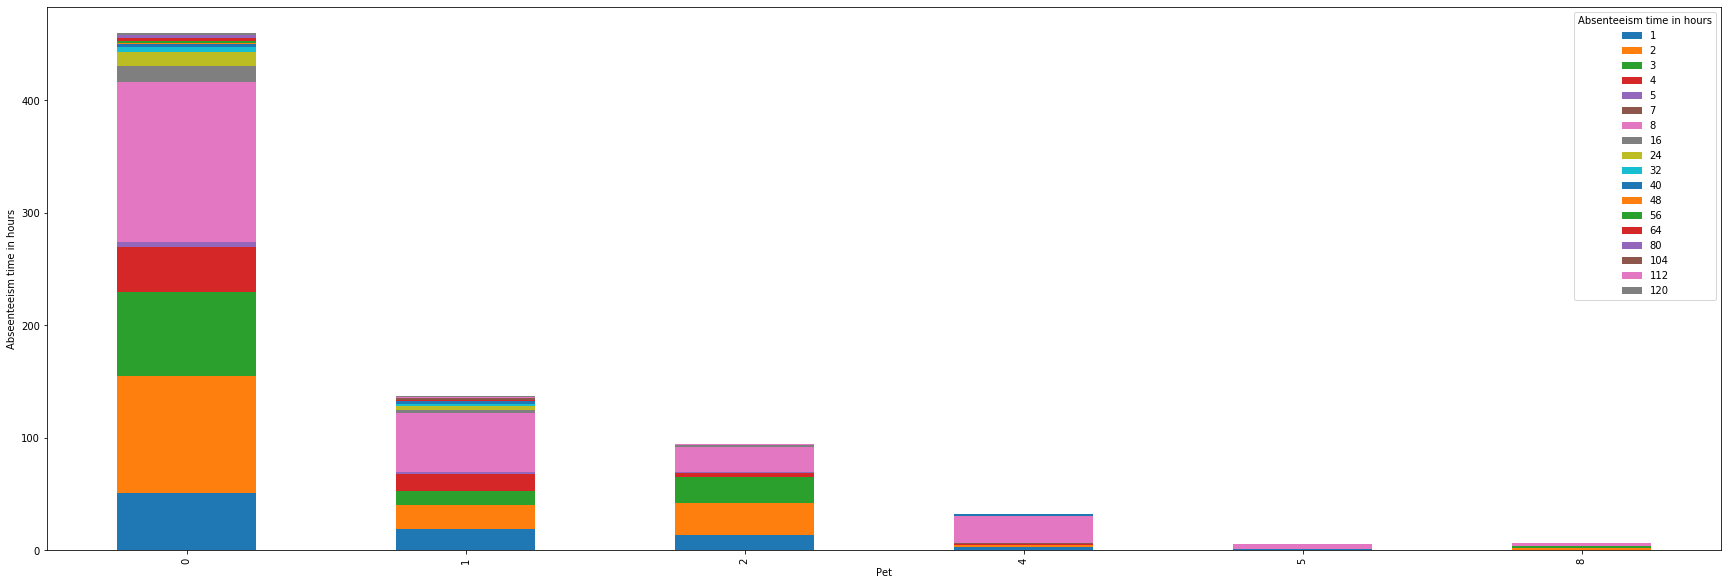

In [37]:
abse.groupby(['Pet','Absenteeism time in hours']).size().unstack().plot(kind='bar',stacked=True,figsize=(30,10))
plt.xlabel('Pet')
plt.ylabel('Abseenteeism time in hours')
plt.show()

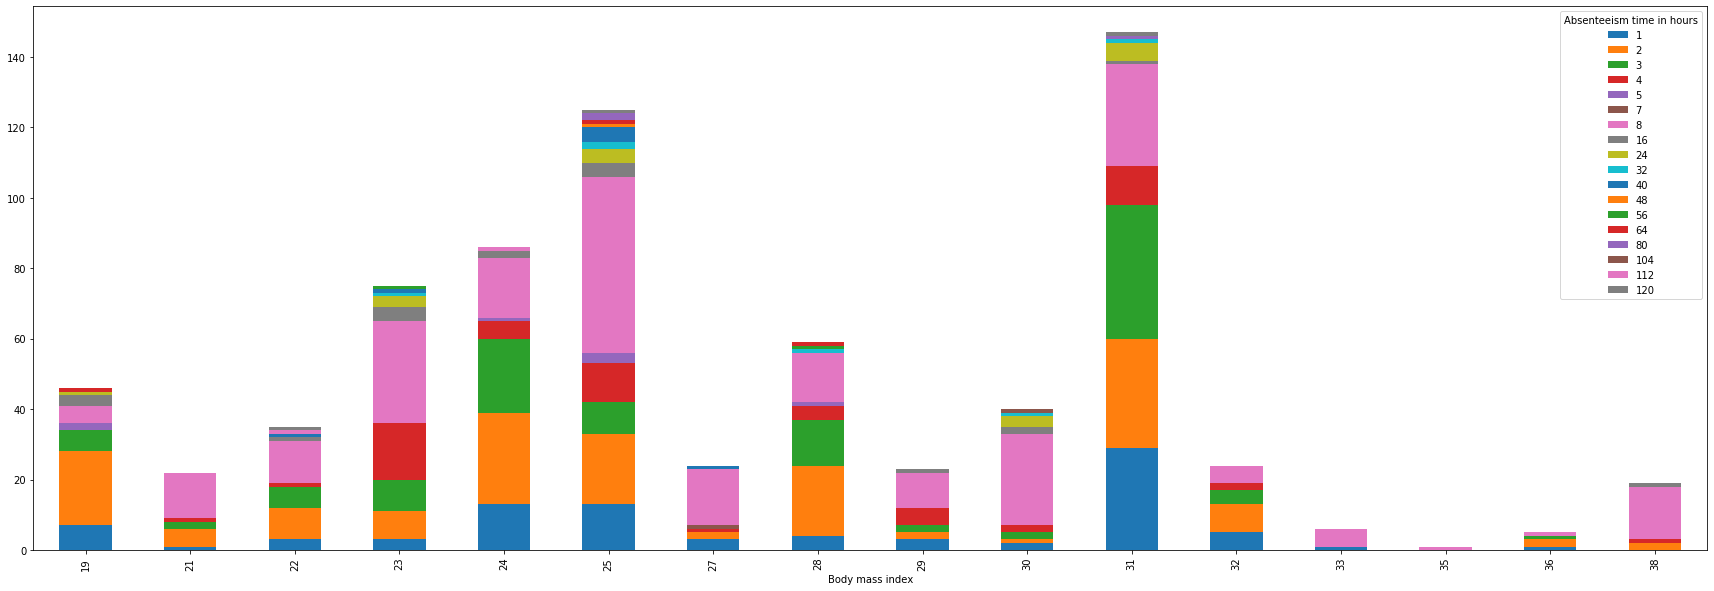

In [38]:
abse.groupby(['Body mass index','Absenteeism time in hours']).size().unstack().plot(kind='bar',stacked=True,figsize=(30,10))


The above plot is showing the absenteeism at work in hours with respect to the bmi

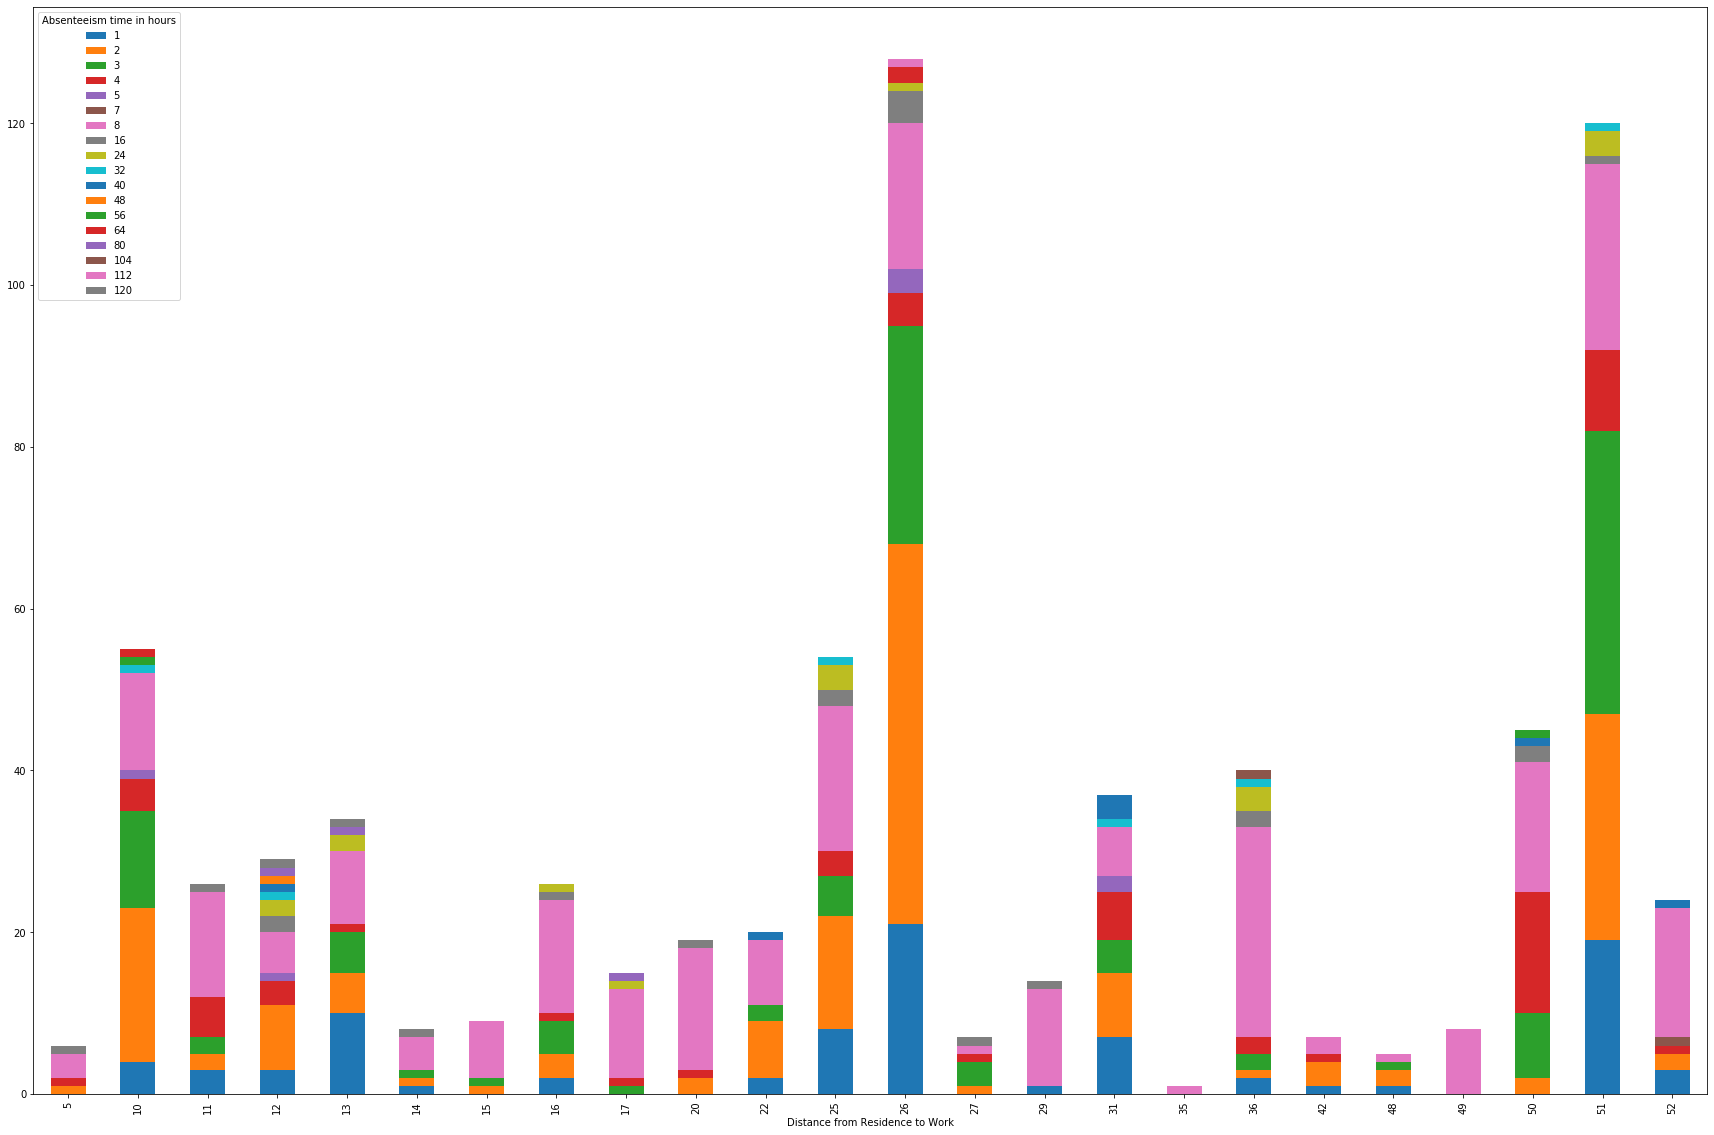

In [40]:
#Lets look at the plot whether ditance to work has impacted the working hours.

abse.groupby(['Distance from Residence to Work','Absenteeism time in hours']).size().unstack().plot(kind='bar',stacked=True,figsize=(30,20))


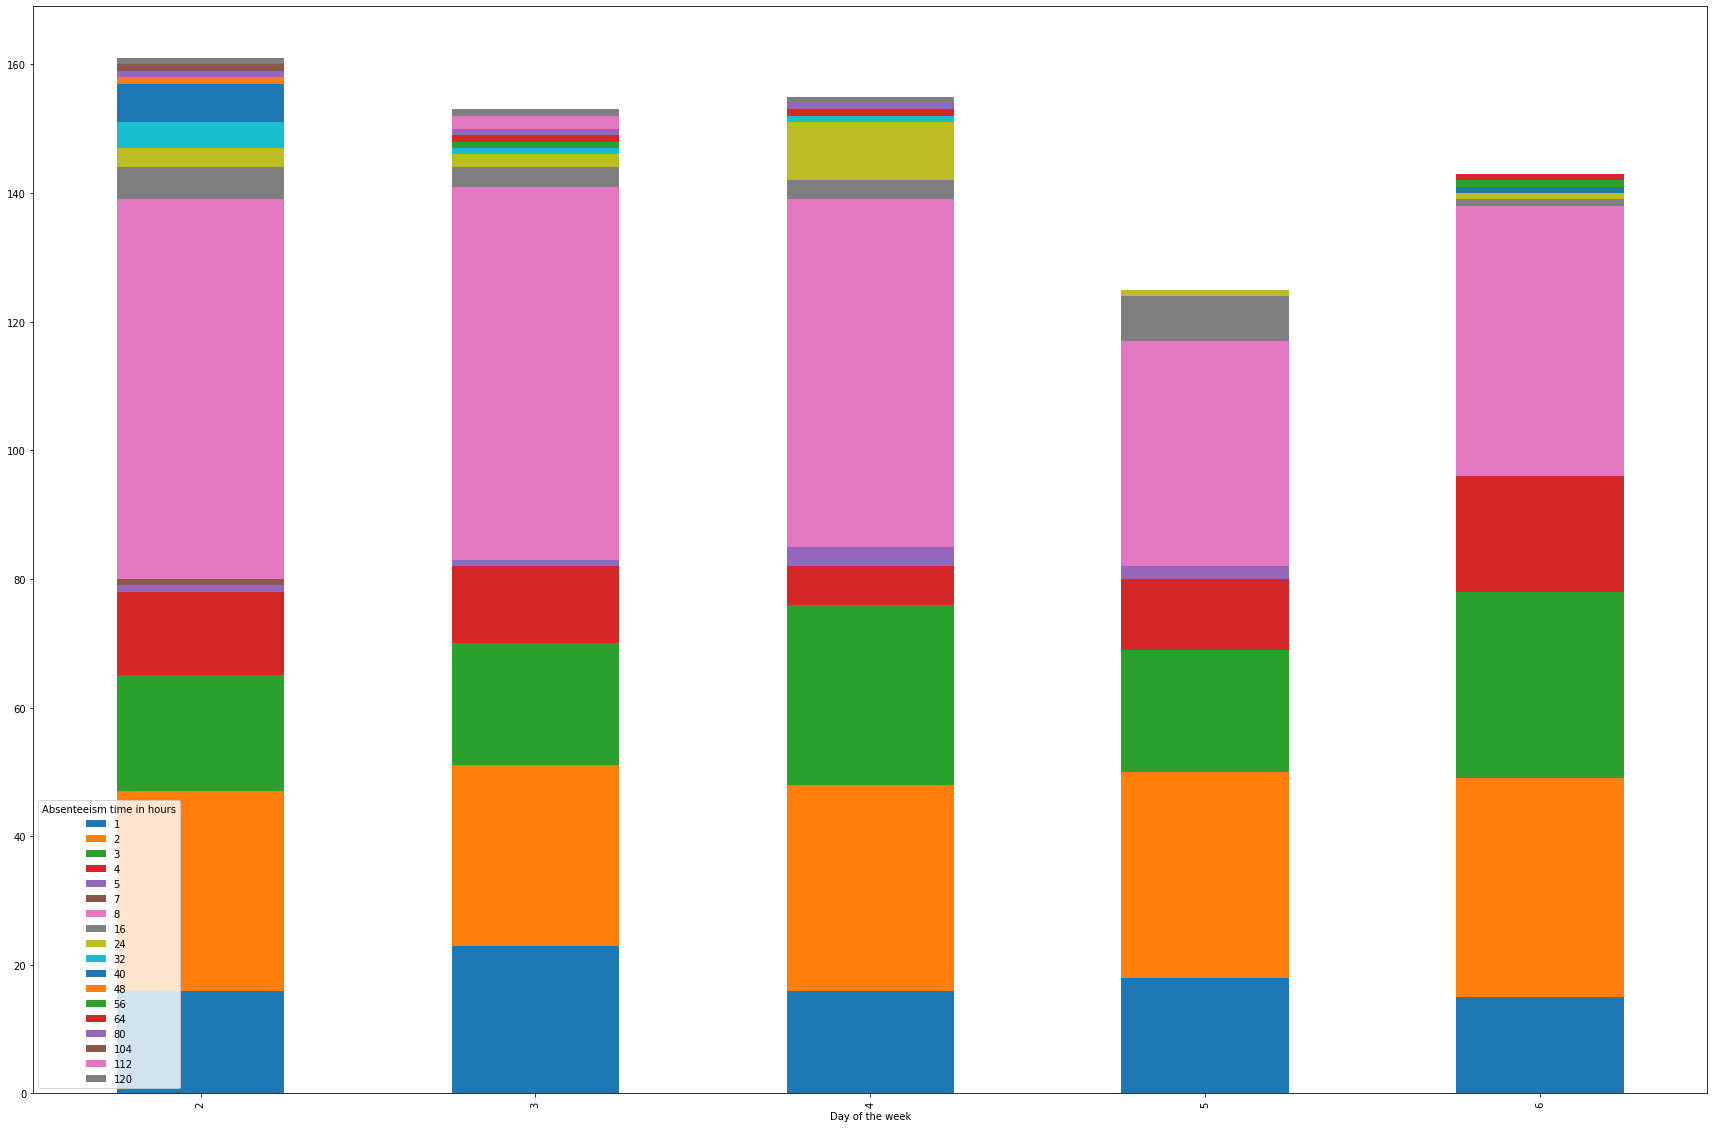

In [41]:
#Checking the frequency of absenteeism on day of the week.

abse.groupby(['Day of the week','Absenteeism time in hours']).size().unstack().plot(kind='bar',stacked=True,figsize=(30,20))


In [42]:
abse['Absenteeism time in hours'].unique()

array([  4,   8,   2,  40,   1,   7,   3,  32,   5,  16,  24,  64,  56,
        80, 120, 112, 104,  48], dtype=int64)

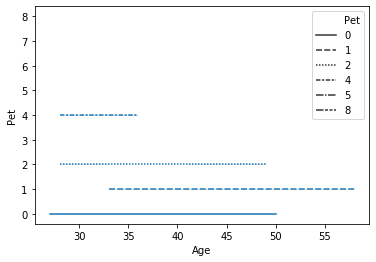

In [50]:
#Checking the correlation between pets and age

sbn.lineplot(x='Age',y='Pet',style='Pet',data=abse)

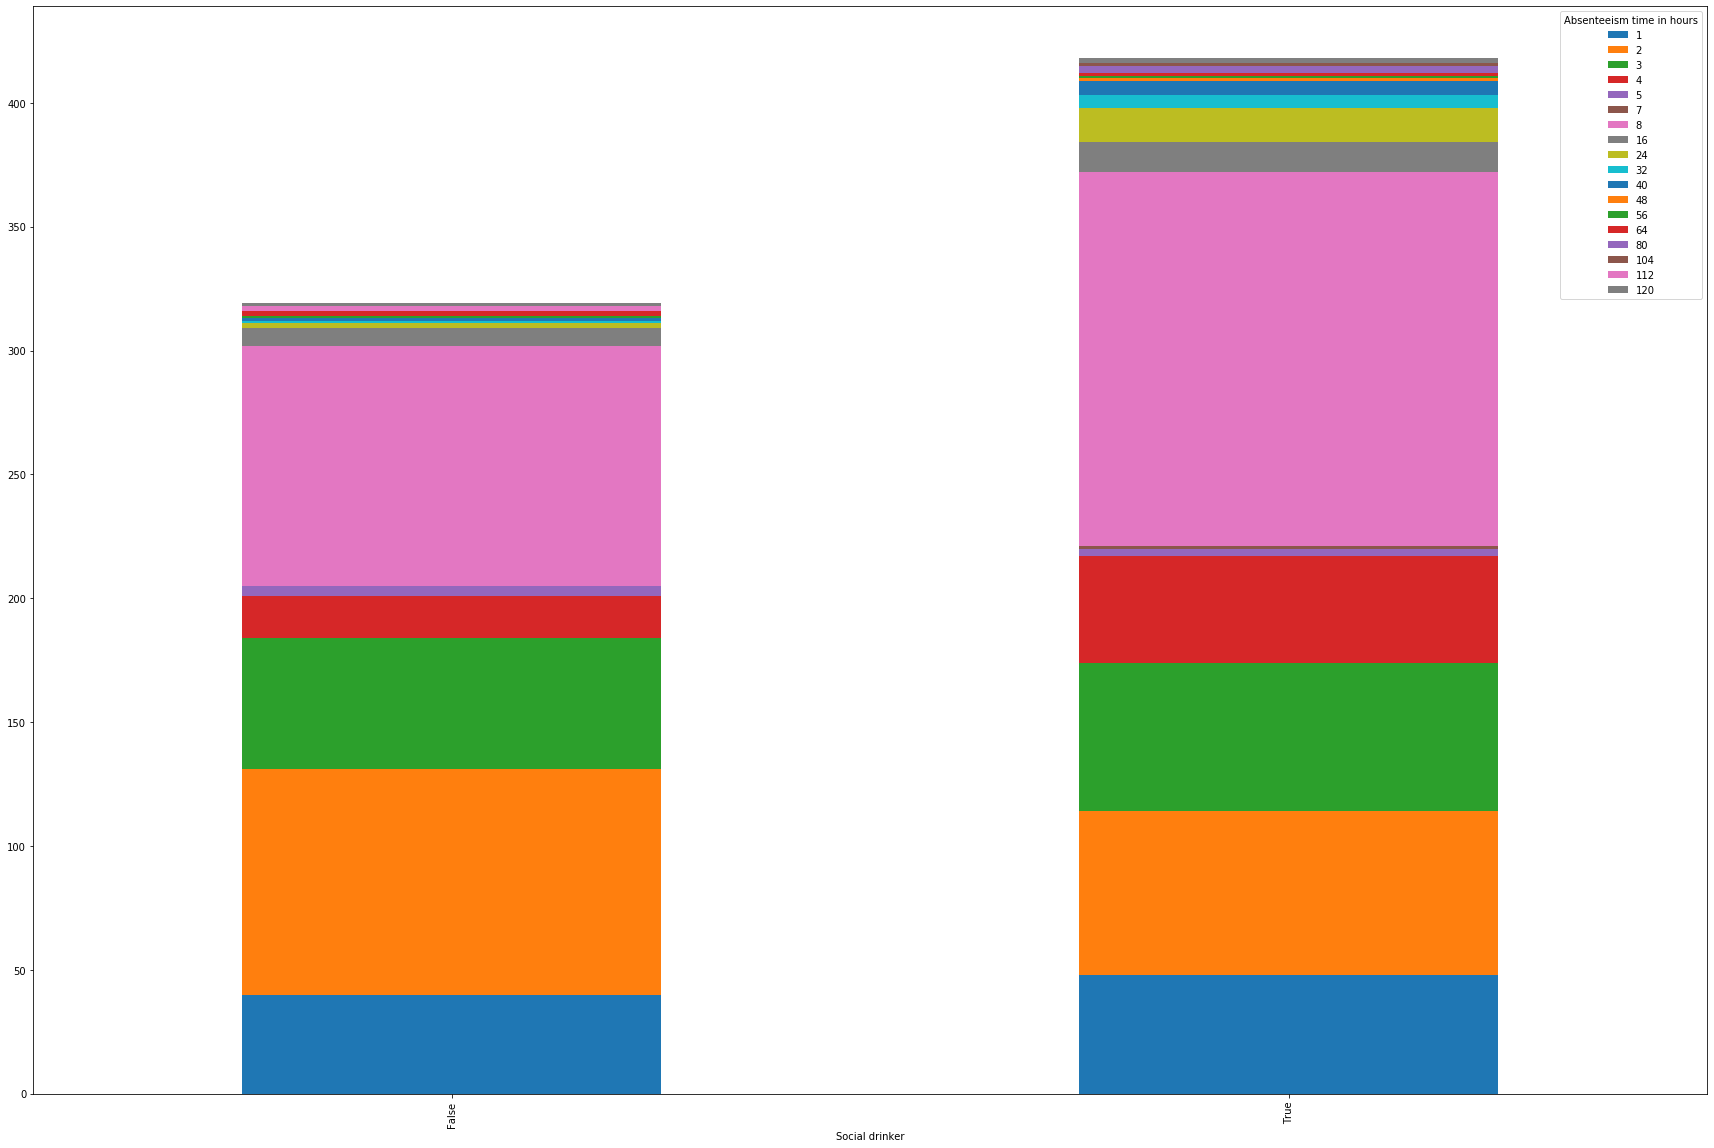

In [52]:
abse.groupby(['Social drinker','Absenteeism time in hours']).size().unstack().plot(kind='bar',stacked=True,figsize=(30,20))


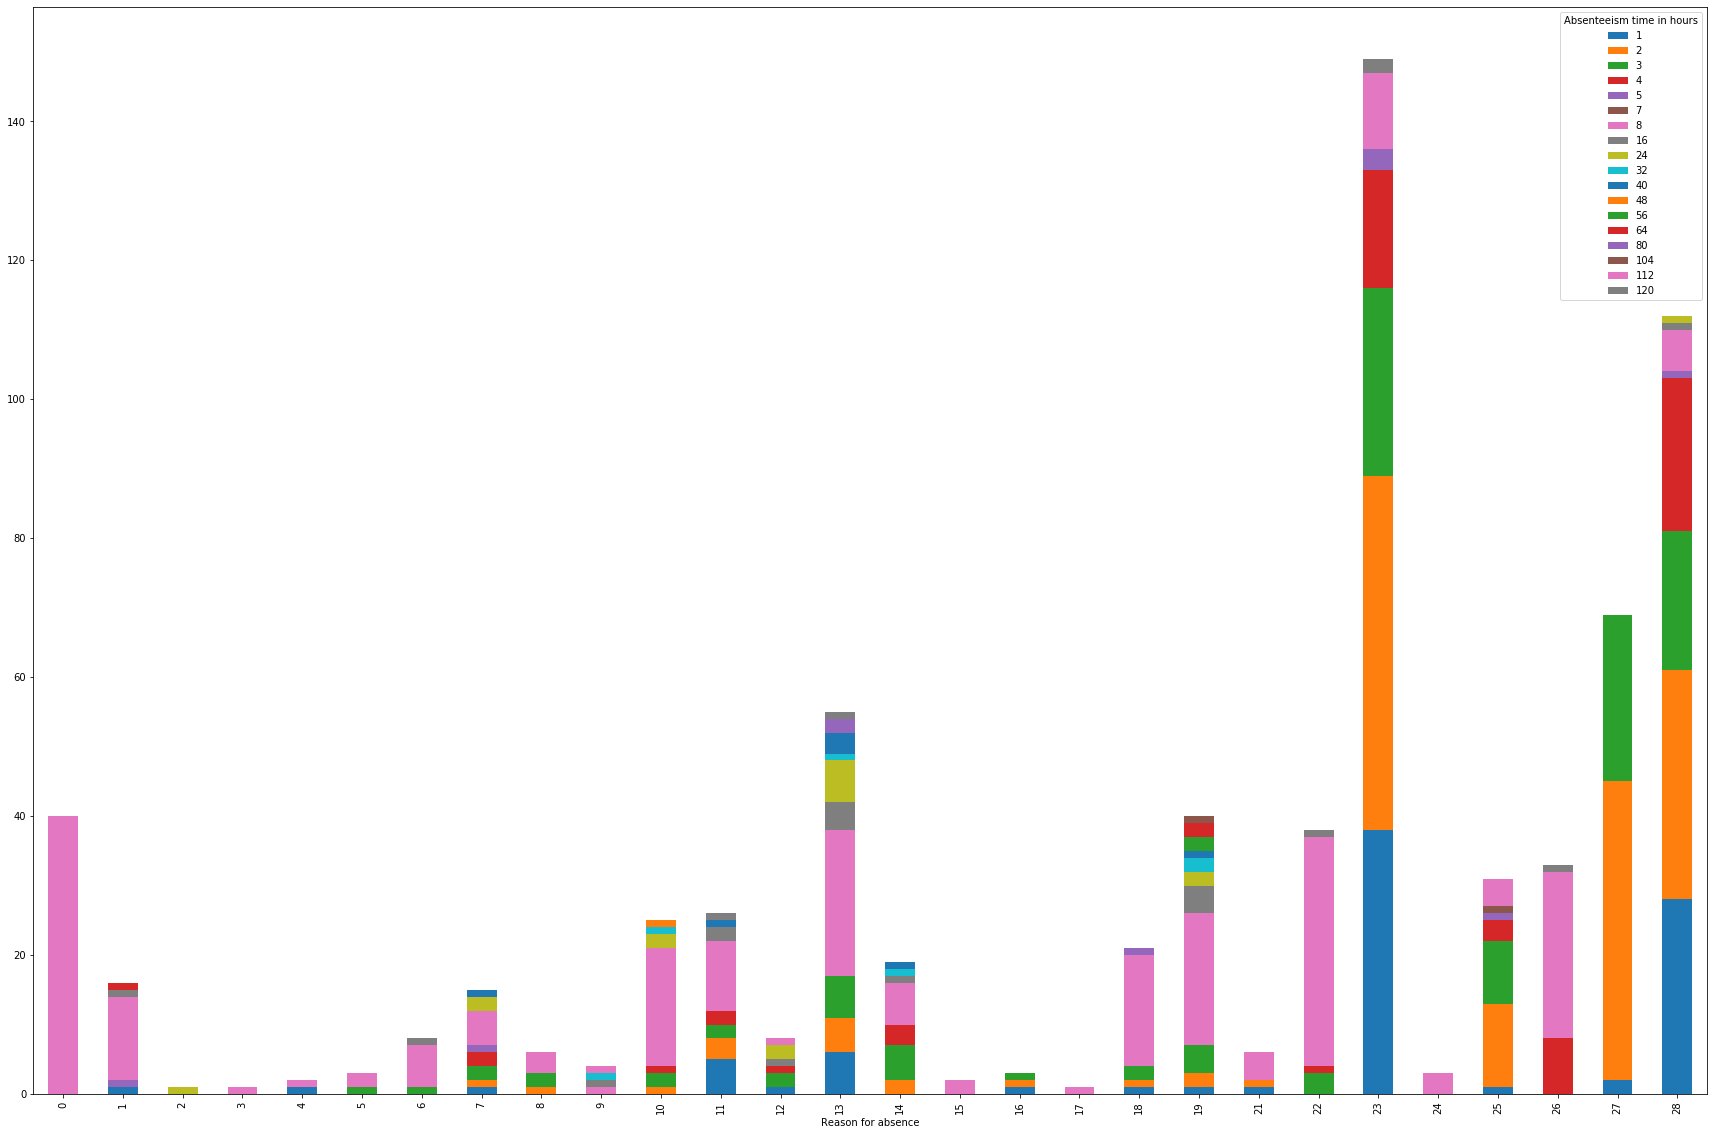

In [53]:
abse.groupby(['Reason for absence','Absenteeism time in hours']).size().unstack().plot(kind='bar',stacked=True,figsize=(30,20))


In [56]:
abse.shape

(737, 21)

In [57]:
#seperating the features and label
x=abse.drop('Absenteeism time in hours',axis=1)
y=abse['Absenteeism time in hours']

In [58]:
#Train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=.22)

In [60]:
rd=RandomForestRegressor()
rd.fit(x_train,y_train)
rpr=rd.predict(x_test)
print('r2 score is ',r2_score(y_test,rpr))

r2 score is  -0.47149894560312


In [61]:
#Classification of the absenteeism in hours
ab_bin=[0,4,8,16,np.inf]
ab_names=['<4','8','16','16+']
abse['range']=pd.cut(abse['Absenteeism time in hours'],ab_bin,labels=ab_names)


In [62]:
X=abse.drop('Absenteeism time in hours',axis=1)
Y=abse['range']
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=45,test_size=.22)

In [68]:
rd=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
rd.fit(x_train,y_train)
rpr=rd.predict(x_test)
print('accuracy score is ',accuracy_score(y_test,rpr))

accuracy score is  0.44785276073619634


In [69]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
parameters={'n_estimators':[10,100,500]}
gsc=GridSearchCV(rf,parameters,cv=5,scoring='accuracy')
gsc.fit(x_train,y_train)
gsc.best_params_

{'n_estimators': 100}

In [70]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rfp=rf.predict(x_test)
print('Accuracy Score is:',accuracy_score(y_test,rfp))
print('Confusion Matrix is :',confusion_matrix(y_test,rfp))
print('Classification Report:',classification_report(y_test,rfp))

Accuracy Score is: 0.4539877300613497
Confusion Matrix is : [[ 7  7  2  0  0  6  2  0  0  0  0  0  0]
 [ 4 17  4  2  0  5  0  0  0  0  0  0  0]
 [ 1  6 11  2  0  7  0  0  0  0  0  0  0]
 [ 2  3  4  3  0  4  0  0  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  3  3  0 36  0  1  0  0  0  0  1]
 [ 0  0  0  0  0  5  0  0  1  0  0  0  0]
 [ 0  0  1  0  0  3  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]]
Classification Report:               precision    recall  f1-score   support

           1       0.47      0.29      0.36        24
           2       0.46      0.53      0.49        32
           3       0.42      0.41      0.42        27
           4       0.30      0.19      0.23        16
           5       0.00      0.00      0.00         2
           8       0.53      0.77      0.63  

In [71]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.3558282208588957
[[ 5  9  3  2  0  3  2  0  0  0  0  0  0  0]
 [ 8 16  3  2  0  3  0  0  0  0  0  0  0  0]
 [ 1  9  8  1  0  5  2  1  0  0  0  0  0  0]
 [ 1  4  3  6  0  1  1  0  0  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  4  6  4  0 23  4  2  0  1  0  0  1  1]
 [ 0  1  0  0  0  3  0  1  0  1  0  0  0  0]
 [ 0  0  1  1  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.31      0.21      0.25        24
           2       0.36      0.50      0.42        32
           3       0.31      0.30      0.30        27
           4       0.38      0.38      0.38        16
           5       0.00      0.00      0.00         2
           8       0.53  

In [72]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
gdk=GridSearchCV(kn,parameters,cv=5,scoring='accuracy')
gdk.fit(x_train,y_train)
gdk.best_params_

{'n_neighbors': 8}

In [73]:
kn=KNeighborsClassifier(n_neighbors=8)
kn.fit(x_train,y_train)
knp=kn.predict(x_test)
print('Accuracy of knn',accuracy_score(y_test,knp))
print('Confisuin Matrix',confusion_matrix(y_test,knp))
print('Classification Report',classification_report(y_test,knp))

Accuracy of knn 0.36809815950920244
Confisuin Matrix [[ 4 13  2  0  0  5  0  0  0  0  0  0]
 [ 7 15  5  0  0  5  0  0  0  0  0  0]
 [ 1 10  9  1  0  6  0  0  0  0  0  0]
 [ 3  2  3  3  0  5  0  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  0  0  0  0  0]
 [ 5  9  2  1  0 29  0  1  0  0  0  0]
 [ 0  2  0  0  0  4  0  0  0  0  0  0]
 [ 1  0  2  0  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0]]
Classification Report               precision    recall  f1-score   support

           1       0.19      0.17      0.18        24
           2       0.28      0.47      0.35        32
           3       0.38      0.33      0.35        27
           4       0.60      0.19      0.29        16
           5       0.00      0.00      0.00         2
           8       0.51      0.62      0.56        47
          16       0.00      0.00      0.00         6
          24       0.00

In [78]:
from sklearn.svm import SVC

sv=SVC(kernel='rbf')
parameters={'kernel':['rbf','linear']}
gdk=GridSearchCV(sv,parameters,cv=5,scoring='accuracy')
gdk.fit(x_train,y_train)
gdk.best_params_


{'kernel': 'linear'}

In [79]:
sv=SVC(kernel='linear')
sv.fit(x_train,y_train)
svp=sv.predict(x_test)
print('Accuracy of knn',accuracy_score(y_test,svp))
print('Confisuin Matrix',confusion_matrix(y_test,svp))
print('Classification Report',classification_report(y_test,svp))


Accuracy of knn 0.3987730061349693
Confisuin Matrix [[ 5 10  0  0  0  9  0  0  0  0  0  0  0]
 [ 5 19  2  0  0  6  0  0  0  0  0  0  0]
 [ 1 16  3  0  0  6  0  0  0  1  0  0  0]
 [ 3  4  1  3  0  5  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 2  4  2  2  0 35  0  0  0  1  0  0  1]
 [ 0  1  1  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  3  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]]
Classification Report               precision    recall  f1-score   support

           1       0.29      0.21      0.24        24
           2       0.34      0.59      0.43        32
           3       0.30      0.11      0.16        27
           4       0.60      0.19      0.29        16
           5       0.00      0.00      0.00         2
           8       0.49      0.74      0.59        47


In [80]:
#Saving to csv.(randomforestclassifier)

rfp=pd.DataFrame(rfp,columns=['absenteeism_predctions'])

In [81]:
rfp.to_csv('absenteeism_predctions.csv',index=False)

In [82]:
#Saving model

import joblib

joblib.dump(rf,'absenteism_predctions.pkl')

['absenteism_predctions.pkl']